# Kernel Density Estimation: Solution for Exercise 2 Under The Assumption of Symmetry

Before running the code, you should install the `sklearn` package. Type in a code cell in the notebook:
```
!pip install sklearn
```

In [1]:
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm, uniform

In [3]:
from scipy.stats import uniform

In [4]:
%matplotlib inline

In [5]:
def kde_sklearn(x, x_grid, bandwidth=0.2, kernel='gaussian', **kwargs):
    """Kernel Density Estimation with Scikit-learn
    valid kernels are ['gaussian'|'tophat'|'epanechnikov'|'exponential'|'linear'|'cosine']
    the default kernel is 'gaussian'"""
    kde_skl = KernelDensity(bandwidth=bandwidth, kernel=kernel, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [6]:
def silverman_rule(x):
    # interquartile range
    iqr = np.percentile(x,75) - np.percentile(x,25)
    # optimal bandwidth
    h = 0.9 * min(np.std(x), iqr/1.34) * len(x)**(-0.2)
    return h

In [7]:
def scott_rule(x):
    # interquartile range
    iqr = np.percentile(x,75) - np.percentile(x,25)
    # optimal bandwidth
    h = 1.059 * min(np.std(x), iqr/1.34) * len(x)**(-0.2)
    return h

In [8]:
from statsmodels.distributions.empirical_distribution import ECDF

## Exercise 2

Generate random bids from a first-price auction with 2 bidders. Assume that bidders are symmetric and their valuations $V_i$ are drawn from a uniform distribution on $[0,1]$ for $i=1,2$.
1. Plot a histogram of the bid distribution.
2. Use the Guerre-Perrigne-Vuong estimator to estimate the distribution of pseudo-valuations from the distribution of bids. Plot a histogram of the distribution of pseudo-valuations.
3. Construct a kernel density estimator for the distribution of pseudo-valuations. Also compute the empirical cdf.

In [9]:
n_observations = 10000
V1 = np.random.rand(n_observations)
V2 = np.random.rand(n_observations)

In [10]:
# generate bids from valuations
B1 = V1/2
B2 = V2/2

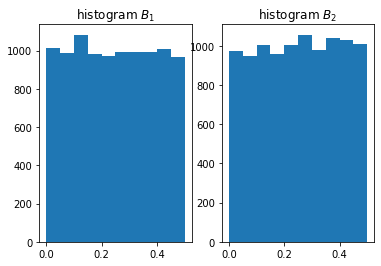

In [11]:
plt.subplot(121)
plt.hist(B1)
plt.title('histogram $B_1$')
plt.subplot(122)
plt.hist(B2)
plt.title('histogram $B_2$');

In [12]:
used_kernel = 'gaussian'

In the following estimation, we assume that bidders are symmetric, i.e. $V_1$ and $V_2$ are drawn from the same distribution. We also assume that a symmetric equilibrium is being played, i.e. both bidders bid according to the same bidding function $\beta(V_i)$.

Estimate density of all bids, evaluated at points B1, 
i.e. pdf($B_{1,i}$) for i=1,...,n_observations

In [13]:
all_bids = np.hstack((B1,B2))

In [14]:
pdf_B1 = kde_sklearn(all_bids, B1, bandwidth=scott_rule(all_bids), 
                     kernel=used_kernel)

Estimate cdf of all bids, evaluated at points B1

In [15]:
cdf_B1 = ECDF(all_bids)(B1)

Estimate density and cdf of all bids evaluated at points B2

In [16]:
pdf_B2 = kde_sklearn(all_bids, B2, bandwidth=scott_rule(all_bids), 
                     kernel=used_kernel)
cdf_B2 = ECDF(all_bids)(B2)

Plot estimated densities and cdfs

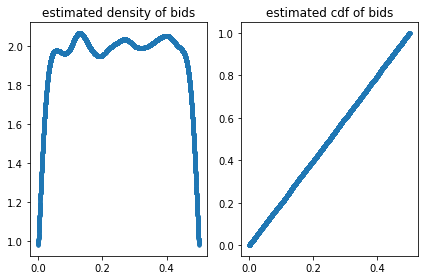

In [17]:
plt.subplot(121)
plt.plot(np.hstack((B1,B2)), np.hstack((pdf_B1, pdf_B2)), '.')
plt.title('estimated density of bids')
plt.subplot(122)
plt.plot(np.hstack((B1,B2)), np.hstack((cdf_B1, cdf_B2)), '.')
plt.title('estimated cdf of bids')
plt.tight_layout();

Compute pseudo-valuations $\hat V_{1,i}$ and $\hat V_{2,i}$ for i=1,...,n_observations

In [18]:
V1hat = B1 + cdf_B1/pdf_B1
V2hat = B2 + cdf_B2/pdf_B2

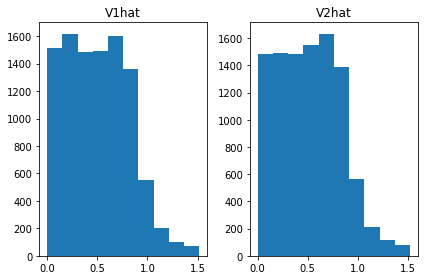

In [19]:
plt.subplot(121)
plt.hist(V1hat)
plt.title('V1hat')
plt.subplot(122)
plt.hist(V2hat)
plt.title('V2hat')
plt.tight_layout();

In [20]:
v_grid = np.linspace(-.5,1.5,1000)

Estimate density and cdf of $\hat V_1$

In [21]:
pdf1hat = kde_sklearn(V1hat, v_grid, bandwidth=scott_rule(V1hat), kernel=used_kernel)
cdf1hat = ECDF(V1hat)(v_grid)

Estimate density and cdf of $\hat V_2$

In [22]:
pdf2hat = kde_sklearn(V2hat, v_grid, bandwidth=scott_rule(V2hat), kernel=used_kernel)
cdf2hat = ECDF(V2hat)(v_grid)

Plot estimated densities and cdfs of $\hat V_1$ and $\hat V_2$

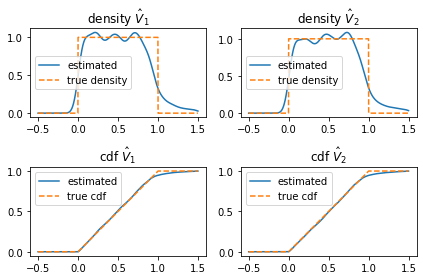

In [23]:
plt.subplot(221)
plt.plot(v_grid, pdf1hat, label='estimated')
plt.plot(v_grid, uniform.pdf(v_grid), label='true density', linestyle='--')
plt.legend()
plt.title('density $\\hat V_1$')
plt.subplot(222)
plt.plot(v_grid, pdf2hat, label='estimated')
plt.plot(v_grid, uniform.pdf(v_grid), label='true density', linestyle='--')
plt.legend()
plt.title('density $\\hat V_2$')
plt.subplot(223)
plt.plot(v_grid, cdf1hat, label='estimated')
plt.plot(v_grid, uniform.cdf(v_grid), label='true cdf', linestyle='--')
plt.legend()
plt.title('cdf $\\hat V_1$')
plt.subplot(224)
plt.plot(v_grid, cdf2hat, label='estimated')
plt.plot(v_grid, uniform.cdf(v_grid), label='true cdf', linestyle='--')
plt.legend()
plt.title('cdf $\\hat V_2$')
plt.tight_layout();